<a href="https://colab.research.google.com/github/vhpraneeth/VIT_DWDM/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Done by

Slot: L7

Reg no: 18BCE7147

Name: V. Hari Praneeth

[GitHub Link](https://github.com/vhpraneeth/VIT_DWDM/blob/main/Project.ipynb)


# Project: __COVID-19 daily cases prediction__ - India

## Load data

In [296]:
import plotly.express as px  # for data visualization

Loading worldwide data

In [297]:
import pandas as pd
link = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(link)  # public data - continuously updated
df.shape  # (rows, columns)

(62392, 50)

In [298]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-27,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


Extracting data for India

In [299]:
country = 'India'
df = df[df['location']==country]  # extract India data from the large dataset
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
25170,IND,Asia,India,2020-12-09,9767371.0,31521.0,33201.000,141772.0,412.0,446.286,7077.783,22.841,24.059,102.733,0.299,0.323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1022712.0,149836767.0,108.577,0.741,1055831.0,0.765,0.031,31.8,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
25171,IND,Asia,India,2020-12-10,9796744.0,29373.0,32169.286,142185.0,413.0,428.143,7099.067,21.285,23.311,103.032,0.299,0.310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,922959.0,150759726.0,109.246,0.669,1028868.0,0.746,0.031,32.0,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
25172,IND,Asia,India,2020-12-11,9826775.0,30031.0,31223.429,142628.0,443.0,418.286,7120.829,21.762,22.626,103.353,0.321,0.303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
25173,IND,Asia,India,2020-12-12,9857029.0,30254.0,30401.000,143019.0,391.0,405.286,7142.752,21.923,22.030,103.637,0.283,0.294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
25174,IND,Asia,India,2020-12-13,9884100.0,27071.0,29556.714,143355.0,336.0,397.429,7162.369,19.617,21.418,103.880,0.243,0.288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


In [300]:
df.columns  # display column names

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

In [301]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
25170,IND,Asia,India,2020-12-09,9767371.0,31521.0,33201.000,141772.0,412.0,446.286,7077.783,22.841,24.059,102.733,0.299,0.323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1022712.0,149836767.0,108.577,0.741,1055831.0,0.765,0.031,31.8,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
25171,IND,Asia,India,2020-12-10,9796744.0,29373.0,32169.286,142185.0,413.0,428.143,7099.067,21.285,23.311,103.032,0.299,0.310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,922959.0,150759726.0,109.246,0.669,1028868.0,0.746,0.031,32.0,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
25172,IND,Asia,India,2020-12-11,9826775.0,30031.0,31223.429,142628.0,443.0,418.286,7120.829,21.762,22.626,103.353,0.321,0.303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
25173,IND,Asia,India,2020-12-12,9857029.0,30254.0,30401.000,143019.0,391.0,405.286,7142.752,21.923,22.030,103.637,0.283,0.294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
25174,IND,Asia,India,2020-12-13,9884100.0,27071.0,29556.714,143355.0,336.0,397.429,7162.369,19.617,21.418,103.880,0.243,0.288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


In [302]:
df = df[['date', 'new_cases', 'new_deaths']]  # extract required data
df['date'] = pd.to_datetime(df['date'])
df.reset_index(drop=True, inplace=True)  # reset index
df.tail()

,date,new_cases,new_deaths
321,2020-12-09,31521.0,412.0
322,2020-12-10,29373.0,413.0
323,2020-12-11,30031.0,443.0
324,2020-12-12,30254.0,391.0
325,2020-12-13,27071.0,336.0


##Checking data - __Data validation__

In [303]:
df.shape  # rows, columns

(326, 3)

No Null values found

In [304]:
df.isnull().sum()

date          0
new_cases     0
new_deaths    0
dtype: int64

No NA values are found

In [305]:
#df = df.fillna(df.mean())  # if NA values are found
df.isna().sum()

date          0
new_cases     0
new_deaths    0
dtype: int64

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        326 non-null    datetime64[ns]
 1   new_cases   326 non-null    float64       
 2   new_deaths  326 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.8 KB


In [307]:
df.describe()

,new_cases,new_deaths
count,326.000000,326.000000
mean,30319.325153,439.739264
std,30300.141872,398.600370
min,0.000000,-1.000000
25%,922.500000,35.250000
50%,22502.000000,418.000000
75%,52924.750000,752.750000
max,97894.000000,2003.000000


##Visualize the data

In [308]:
px.line(df, x='date',y='new_cases', title='date vs new_cases')

## Preparing the data before training - __Preprocessing__

In [309]:
df2 = df.iloc[230:].copy()  # Using data partially
df2.reset_index(drop=True, inplace=True)
df2.head()

,date,new_cases,new_deaths
0,2020-09-09,95735.0,1172.0
1,2020-09-10,96551.0,1209.0
2,2020-09-11,97570.0,1201.0
3,2020-09-12,94372.0,1114.0
4,2020-09-13,92071.0,1136.0


In [310]:
px.line(df2, x='date', y='new_cases', title='Date vs New cases')

In [311]:
px.scatter(df2, x='date', y='new_cases', title='Date vs New cases')

In [312]:
X = df2[['date']]
y = df2['new_cases']

In [313]:
import datetime
X = pd.DataFrame(X, dtype='<M8[ns]')
X['date'] = pd.to_datetime(X['date'])
X['date'] = X['date'].map(datetime.datetime.toordinal)

In [314]:
from sklearn.model_selection import train_test_split

Finding best test size

In [328]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

for size in range(5, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size)
    regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test) * 100
    print(f"{size}: {score}, {score1}")

5: 90.98168620734126, 89.81014080111213
6: 92.01455675592027, 89.81014080111213
7: 68.91997325200936, 89.81014080111213
8: 70.5251618250944, 89.81014080111213
9: 88.35742666055889, 89.81014080111213
10: 87.95247234449668, 89.81014080111213


Splitting train and test data

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6)
X_test.shape

(6, 1)

## Training the model - using __Linear Regression__

This finds the equation of a straight line that is __closest to all points observed__.

Finds supremum distance along Y-axis

In [317]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plotting the regression line

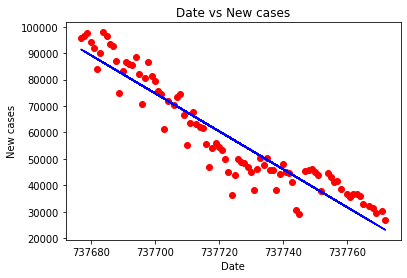

In [318]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='red')  # scatter values
plt.plot(X_train, regressor.predict(X_train), color='blue')  # plot regression line
plt.title('Date vs New cases')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.show() 

In [319]:
predicted = regressor.predict(X_test)
predicted

array([71296.50597781, 41833.11979061, 32491.0705117 , 24586.25958341,
       36802.78556347, 27460.73628461])

## Comparing predicted and actual

In [320]:
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
df_compare = df_compare.join(X_test['date'])
df_compare.head()

,Actual,Predicted,date
28,78524.0,71296.505978,737705
69,38617.0,41833.119791,737746
82,31118.0,32491.070512,737759
93,30031.0,24586.259583,737770
76,44376.0,36802.785563,737753


In [321]:
df_compare.shape

(6, 3)

In [322]:
graph_df = df_compare.head(50).copy()
graph_df.drop(['date'], axis=1, inplace=True)
graph_df.head()

,Actual,Predicted
28,78524.0,71296.505978
69,38617.0,41833.119791
82,31118.0,32491.070512
93,30031.0,24586.259583
76,44376.0,36802.785563


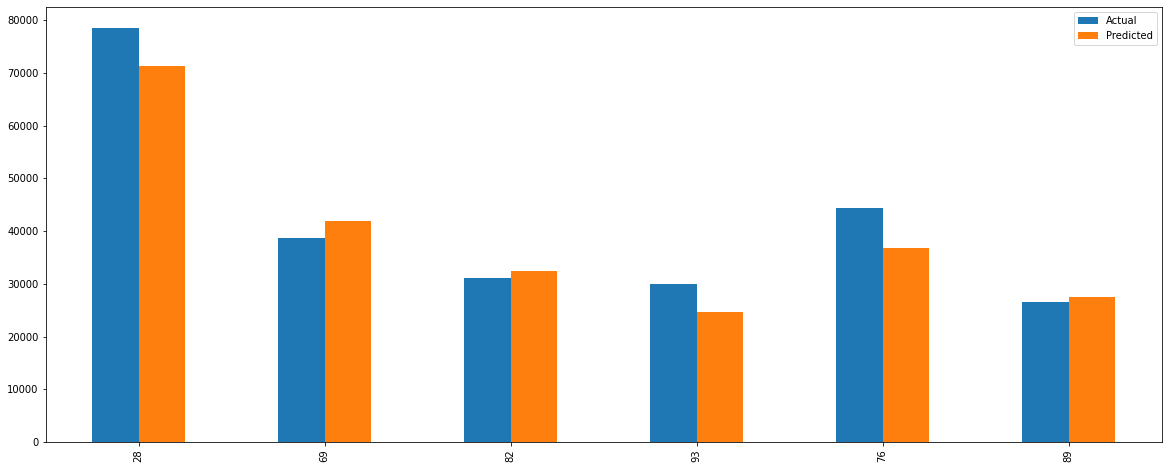

In [323]:
graph_df.plot(kind='bar', figsize=(20,8))

In [324]:
regressor.score(X_test, y_test)  # Score of the regressor

0.9176809681295147

## Prediction using custom values

Display today's date

In [325]:
from datetime import date

today_date = date.today().strftime("%d-%m-%y")
print("Today's date:", today_date)

Today's date: 14-12-20


Predict for today

In [326]:
X_test_2 = pd.DataFrame({'date': date.today()}, index=[0])
X_test_2 = pd.DataFrame(X_test_2, dtype='<M8[ns]')
X_test_2['date'] = X_test_2['date'].map(datetime.datetime.toordinal)

#regressor.fit(X, y)  # training using the whole data
result = regressor.predict(X_test_2)
result = int(result[0])
print('Prediction for today:', result)

Prediction for today: 22430


#Thank you

.

.

.


.

.

.

.

.

.

.

.

.

Extra project below

# Project 2: __Stock market prediction__ using Regression

Import the library for data visualization

In [ ]:
import plotly.express as px

##Get the stock data

In [ ]:
import pandas as pd
import pandas_datareader as web  # for loading stock market data
df = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2020-12-11')
df.head()  # Show the data 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.696352
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.000614
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.002876
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.339447
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.274624


Data has 2003 rows and 7 columns

Drop Adj Close column and make Date as a column instead of index

In [ ]:
df.drop('Adj Close',axis = 1, inplace = True)
df['Date'] = pd.to_datetime(df.index)
df.reset_index(drop=True, inplace=True)
df.head()

,High,Low,Open,Close,Volume,Date
0,27.860001,26.837500,27.847500,27.332500,212818400.0,2015-01-02
1,27.162500,26.352501,27.072500,26.562500,257142000.0,2015-01-05
2,26.857500,26.157499,26.635000,26.565001,263188400.0,2015-01-06
3,27.049999,26.674999,26.799999,26.937500,160423600.0,2015-01-07
4,28.037500,27.174999,27.307501,27.972500,237458000.0,2015-01-08


##Checking data

In [ ]:
df.shape

(1498, 6)

No null values found

In [ ]:
df.isnull().sum()

High      0
Low       0
Open      0
Close     0
Volume    0
Date      0
dtype: int64

No NA values found

In [ ]:
df.isna().any()

High      False
Low       False
Open      False
Close     False
Volume    False
Date      False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   High    1498 non-null   float64       
 1   Low     1498 non-null   float64       
 2   Open    1498 non-null   float64       
 3   Close   1498 non-null   float64       
 4   Volume  1498 non-null   float64       
 5   Date    1498 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 70.3 KB


In [ ]:
df.describe()

,High,Low,Open,Close,Volume
count,1498.000000,1498.000000,1498.000000,1498.000000,1.498000e+03
mean,47.881831,46.880966,47.374282,47.404439,1.441474e+08
std,24.365712,23.587720,23.993151,23.994762,7.309331e+07
min,22.917500,22.367500,22.500000,22.584999,2.019780e+07
25%,29.943125,29.481250,29.677499,29.762500,9.515900e+07
50%,41.559999,40.627501,40.986250,41.006250,1.269370e+08
75%,54.024375,52.856875,53.438750,53.318749,1.752112e+08
max,137.979996,130.529999,137.589996,134.179993,6.488252e+08


##Visualize the data

Plotting the close price history

In [ ]:
px.line(df, x='Date',y='Close', title='Close Price History')

Plotting High vs Low

In [ ]:
px.scatter(df, x='High',y='Low', title='High vs Low')

Plotting Open vs Close

In [ ]:
px.scatter(df, x='Open',y='Close', title='Open vs Close')

## Preparing data for training - __Preprocessing__

In [ ]:
X = df[['Open','High','Low','Volume']]
y = df['Close']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
for size in range(5, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size/10)
    regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test) * 100
    score1 = regressor.score(X_train, y_train) * 100
    print(f"{size}: {score}, {score1}")

5: 99.96707498066007, 99.97053816845707
6: 99.96525539298136, 99.97521713010975
7: 99.96267906190236, 99.975509312676
8: 99.96474845746232, 99.98121693103779
9: 99.96075714855141, 99.97911113532331


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_test.shape

(375, 4)

Rows in training data

In [ ]:
X_train.shape

(1123, 4)

Rows in testing data

In [ ]:
X_test.shape

(375, 4)

In [ ]:
X_test.head()

,Open,High,Low,Volume
49,30.969999,31.237499,30.717501,143497200.0
780,40.772499,40.849998,39.767502,206434400.0
673,40.937500,41.062500,40.139999,117874000.0
817,41.910000,42.187500,41.220001,121112000.0
700,39.087502,39.342499,38.932499,64500400.0


In [ ]:
y_test.head()

49     31.237499
780    39.884998
673    40.520000
817    42.097500
700    39.000000
Name: Close, dtype: float64

## Training the model

The aim of regression is to find the linear relationship between two variables.
This is in turn translated into a mathematical problem of finding the equation
of the line that is closest to all points observed.
[Link](http://www.ams.sunysb.edu/~zhu/ams571/Regression.pdf)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicted = regressor.predict(X_test)

## Comparing predicted and actual

In [ ]:
df_compare = pd.DataFrame({'Actual':y_test, 'Predicted':predicted})
df_compare.join(df['Date'])
df_compare.head()

,Actual,Predicted
49,31.237499,30.979844
780,39.884998,40.046197
673,40.520000,40.403633
817,42.097500,41.577148
700,39.000000,39.180287


In [ ]:
df_compare.shape

(375, 2)

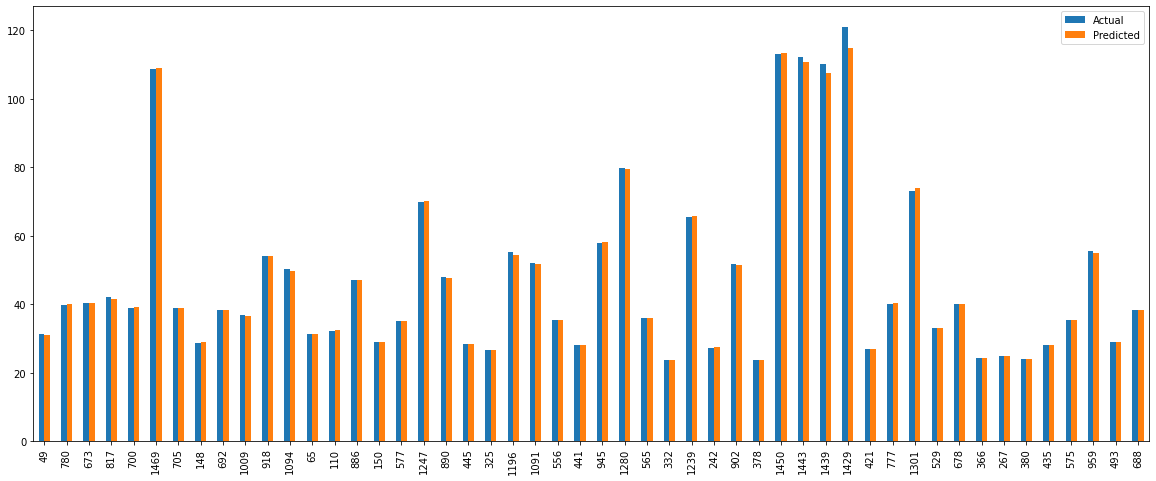

In [ ]:
graph_df = df_compare.head(50)
graph_df.plot(kind='bar', figsize=(20,8))

## Score of the regressor

In [ ]:
regressor.score(X_test, y_test)

0.9995357888449022

Prediction using custom values

In [ ]:
X_test_2 = pd.DataFrame({'Open': 37, 'High': 38, 'Low': 37, 'Volume': 146640000.0}, index=[0])
prediction = regressor.predict(X_test_2)
print('Prediction for Close:', prediction[0])

Prediction for Close: 37.7486687824542
